# Introduction

Ceci est une collection de jeux simple que j'ai codé avec le language de python.Mon but est de montrer mon habilité technique et ma facilité avec le language et non ma capacité à faire des jeux.

J'ai inclue trois de mes plus grands jeux, dont Wordle, Taquin et un labyrinthe. Amusez vous!

In [4]:
#@title Importations

import matplotlib.pyplot as plt
import random
import copy
import time

# Description de Wordle

Wordle est un jeux de devinette de mot à 6 essai. À chaque tour, on inscrit un mot à cinq lettre (en anglais). Si une lettre est dans la bonne position, elle devient verte: si elle est présente dans le mot mais pas dans la bonne position, elle deveint jaune; si la lettre n'est pas dans le mot, elle devient rouge.

In [5]:
#@title Fonctions de wordle

def analyser_essai(essai, solution): #retourne une liste de couleur à chauqye position
  list(solution)
  resultat = ""
  for i in range(5):
      if essai[i] == solution[i]:
        resultat += "g"
      elif essai[i] in solution:
        resultat += "j"
      else:
        resultat+="r"
  return resultat

def mot_aleatoire():
  words = ["giant","gnome","windy","abide","laugh","snake","apple","board","write","fried","sneak","musty","music","watch","raven","clove","grade","climb","trade","gonna","eaten","small","quite","quick","route","bunny","night","alive","fight","three","kinda","wired","tired","doing","trust","lemon","peach","never","train","leave","gamer","table","death","world","water","plead","charm","amend","bored","dream","eager","found","grand","humid","image","jazzy", "kitty", "learn", "mourn", "noise", "order", "price", "quack", "brain", "roach","steak", "train", "usher", "voice", "young", "zebra"]
  return words[random.randint(0,len(words)-1)]


Essai #1- Entrez 5 lettres: gamer


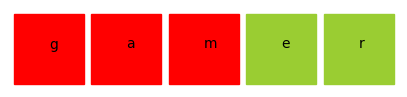

Pas dans le mot:  gam
Dans le mot:  er Pas utilisé:  qwertasdfghjklzxcvbnm
Essai #2- Entrez 5 lettres: lover


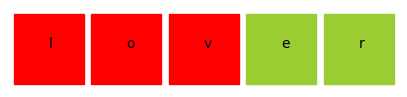

Pas dans le mot:  gamlov
Dans le mot:  erer Pas utilisé:  qwertasdfghjklzxcvbnm
Essai #3- Entrez 5 lettres: mimer 
Taille invalide
Essai #3: Entrez 4 chiffres entre 0 et 9: mimer


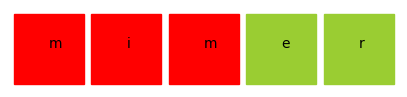

Pas dans le mot:  gamlovmim
Dans le mot:  ererer Pas utilisé:  qwertasdfghjklzxcvbnm
Essai #4- Entrez 5 lettres: never


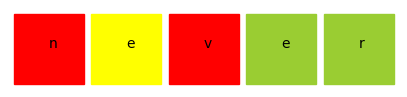

Pas dans le mot:  gamlovmimnv
Dans le mot:  ererereer Pas utilisé:  qwertasdfghjklzxcvbnm
Essai #5- Entrez 5 lettres: eager


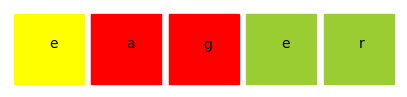

Pas dans le mot:  gamlovmimnvag
Dans le mot:  ererereereer Pas utilisé:  qwertasdfghjklzxcvbnm
Essai #6- Entrez 5 lettres: queer


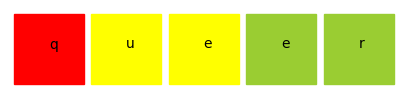

Pas dans le mot:  gamlovmimnvagq
Dans le mot:  ererereereerueer Pas utilisé:  qwertasdfghjklzxcvbnm
Essai #7- Entrez 5 lettres: usher
Bravo, vous avez trouvé après 7 essai(s)
Merci d'avoir jouer à ma version de Wordle
 Auteur: Brianna Masas Balcazar


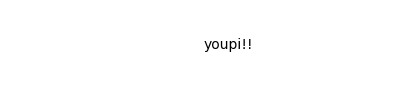

In [10]:
#@title Wordle à 5 lettres

def afficher_erreur_q4(solution):
  print(f"Bien essayé, la solution était {solution}")
  print("Merci d'avoir jouer à ma version de Wordle\n Auteur: Brianna Masas Balcazar")

def afficher_resultat_q4(nombre_de_essais):
  print(f"Bravo, vous avez trouvé après {nombre_de_essais} essai(s)")
  print("Merci d'avoir jouer à ma version de Wordle\n Auteur: Brianna Masas Balcazar")




solution = mot_aleatoire()
essai = "00000"
i = 1
pas_utilise = "qwertasdfghjklzxcvbnm"
pas_dans_le_mot= ""
dans_le_mots = ""


while essai != solution and i < 8:
    plt.figure(figsize=(5,1))
    plt.xlim(-0.5,4.5)
    plt.ylim(0,1)
    plt.axis("off")
    essai = (input("Essai #"+ str(i)+ "- Entrez 5 lettres: ")).lower()


    while len(essai)!= 5:
       print("Taille invalide")
       essai = input("Essai #"+str(i)+": Entrez 4 chiffres entre 0 et 9: ")

    if essai == solution:
      afficher_resultat_q4(i)
      plt.text(2,0.5, "youpi!!")

    else:
      couleur = list(analyser_essai(essai,solution))
      for j in range(5):
        if couleur[j]== "g":
          dans_le_mots += essai[j]
          pas_utilise.replace(essai[j], "")
          plt.plot(j,0.5,"s",c="yellowgreen", ms=50)
          plt.text(j,0.5, essai[j])
        elif couleur[j]=="j":
          dans_le_mots += essai[j]
          pas_utilise.replace(essai[j], "")
          plt.plot(j,0.5,"s",c="yellow", ms=50)
          plt.text(j,0.5, essai[j])
        elif couleur[j]=="r":
          pas_dans_le_mot += essai[j]
          pas_utilise.replace(essai[j], "")
          plt.plot(j,0.5,"s",c="red", ms=50)
          plt.text(j,0.5, essai[j])
      plt.show()
      print("Pas dans le mot: ", pas_dans_le_mot)
      print("Dans le mot: ", dans_le_mots, "Pas utilisé: ", pas_utilise)
      i += 1


if i==8:
  afficher_erreur_q4(solution)

# Description de Taquin

Le but de taquin est d'organiser les tiles numérotés en ordre croissant dans le moins de déplacement possible. Vous deplacer la tile **vide** vers le haut (h), vers le bas(b), vers la droite(d) ou vers la gauche (g).

In [8]:
#@title Fonction de Taquin

NB_LIGNES = 3
NB_COLONNES = 3

class Grille:
    def __init__(self, valeurs=""):
        self._valeurs = valeurs
        self._position_x = self._valeurs.index("X")     #position de x dans la chaine de charactère
        self._ligne_x = self._valeurs.index("X") // 3   #ligne dans une matrice pour x
        self._colonne_x = self._valeurs.index("X") % 3  #colonne dans une matrice

    def get_chaine_grille(self):
      return self._valeurs

    def remplacer(self, rechercher, remplaceur):
      return self._valeurs.replace(rechercher, remplaceur)    #Ceci est juste pour remplacer le X par un espace pour l'affichage de la grille.

    def coups_possibles(self):
      coups_possible = []
      if self._ligne_x == 0 or self._ligne_x == 1:
        coups_possible.append("B")
      if self._ligne_x == 1 or self._ligne_x == 2:
        coups_possible.append("H")
      if self._colonne_x == 0 or self._colonne_x == 1:
        coups_possible.append("D")
      if self._colonne_x == 1 or self._colonne_x == 2:
        coups_possible.append("G")

      return coups_possible


    def jouer_coup(self, coup):
      liste_valeurs= list(self._valeurs)
      if coup in self.coups_possibles():
        if coup == "H":
          liste_valeurs[self._position_x], liste_valeurs[self._position_x-3] = liste_valeurs[self._position_x-3], liste_valeurs[self._position_x]
        if coup == "D":
          liste_valeurs[self._position_x], liste_valeurs[self._position_x+1] = liste_valeurs[self._position_x+1], liste_valeurs[self._position_x]
        if coup == "G":
          liste_valeurs[self._position_x], liste_valeurs[self._position_x-1] = liste_valeurs[self._position_x-1], liste_valeurs[self._position_x]
        if coup == "B":
          liste_valeurs[self._position_x], liste_valeurs[self._position_x+3] = liste_valeurs[self._position_x+3], liste_valeurs[self._position_x]
      return "".join(liste_valeurs)


class Resolveur:

    def __init__(self, grille):
        self._grille = copy.deepcopy(grille)  # La grille à solutionner
        self._liste_coups = []

    def solutionner(self):
      profondeur = 1
      liste_coups = []
      while profondeur < 25:
        if recursion_solution(profondeur, self._grille, [self._grille], liste_coups):  # Voir la section fonction pour la fonction recursion
          return liste_coups   #inverse de la liste (Je l'inverse plus tard)

        else:
          profondeur += 1


def verification_description(description): #Verifie si la chaine est bien de forme "12345678X"
  verification = True
  for chiffre in range(1, 8+1):
    if str(chiffre) not in description:
      verification = False
  if "X" not in description:
    verification = False
  if len(description)!= 9:
    verification = False
  return verification

def description_possible(description):   #Verifie si la description donne est possible (retourne faux si impossible)
  description = (description.replace("X", ""))
  description = list(description)
  i= 0
  inversion = 0
  while i < 8:
   j= i+1
   while j<8:
     if int(description[i])> int(description[j]):
       inversion += 1
     j+=1
   i+=1
  if inversion%2 == 0:
    return True
  else:
    return False


def creer_chaine_aleatoire():
  liste_num = ["1","2","3","4","5","6","7","8","X"]
  random.shuffle(liste_num)
  return "".join(liste_num)


                                           # evaluer_deja = memoisation
def recursion_solution(profondeur, grille_recursion, evaluer_deja, liste_de_coup):   # recursion pour la classe resolveur

    if grille_recursion.get_chaine_grille() == "12345678X":
      return True

    elif profondeur == 0:
      return False

    else:

     for coups in grille_recursion.coups_possibles():

        copie_grille = copy.deepcopy(grille_recursion)
        if (copie_grille.jouer_coup(coups)) not in evaluer_deja:

          grille_a_tester = Grille(copie_grille.jouer_coup(coups))


          if recursion_solution(profondeur - 1, grille_a_tester, evaluer_deja, liste_de_coup):
            liste_de_coup.append(coups)
            return True

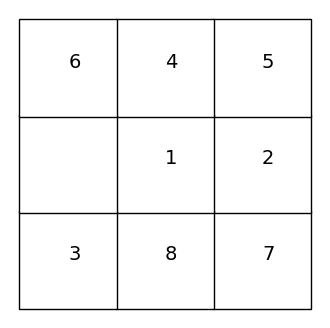

Choisir parmi ces options:
Générer une nouvelle grille aléatoire       (A) 
Créer une grille à partir d'une description (C) 
Déplacer la case vide                       (H, B, G, D) 
Afficher la solution                        (S) 
Tester une solution                         (T) 
Quitter ce programme                        (Q)
Entrez votre choix: C
Entrez la description du problème: 12345678
Cette chaine n'est pas valide


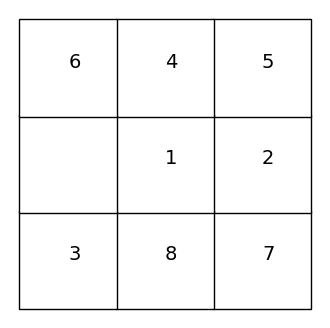

Choisir parmi ces options:
Générer une nouvelle grille aléatoire       (A) 
Créer une grille à partir d'une description (C) 
Déplacer la case vide                       (H, B, G, D) 
Afficher la solution                        (S) 
Tester une solution                         (T) 
Quitter ce programme                        (Q)
Entrez votre choix: C
Entrez la description du problème: 1234567X89
Cette chaine n'est pas valide


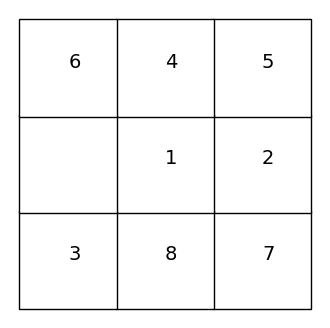

Choisir parmi ces options:
Générer une nouvelle grille aléatoire       (A) 
Créer une grille à partir d'une description (C) 
Déplacer la case vide                       (H, B, G, D) 
Afficher la solution                        (S) 
Tester une solution                         (T) 
Quitter ce programme                        (Q)
Entrez votre choix: Q
Merci d'avoir jouer à ma version de taquin
 Auteur: Brianna Masas Balcazar


In [9]:
#@title Taquin 3x3

def __main__():

    chaine_principale = None
    menu = True
    while menu:

     # CREER UNE CHAINE ALEATOIRE AU DEBUT

      if chaine_principale == None:
       chaine_a_verifier = creer_chaine_aleatoire()

       while not description_possible(chaine_a_verifier):
          chaine_a_verifier = creer_chaine_aleatoire()
       chaine_principale = Grille(chaine_a_verifier)


      # GRILLE VISUALITATION

      k=0
      chaine_rep = chaine_principale.remplacer("X", " ")
      plt.figure(figsize = (4,4))
      plt.xlim(-0.1,3.1)
      plt.ylim(-0.1,3.1)
      plt.axis("off")
      for i in range(2,-1,-1):
       for j in range(3):
        plt.plot(i+0.5,j+0.5, "s",c= "w",markeredgecolor="k", ms=70)
        plt.text(j+0.5 , i+0.5, chaine_rep[k], fontsize =14)
        k+=1
      plt.show()


      # CAS GAGNANT
      chaine_gagnante = Grille("12345678X")
      if chaine_principale.get_chaine_grille() == chaine_gagnante.get_chaine_grille():
        chaine_principale = None
        print("Vous avec trouvé la solution.")
        input("Appuyez sur la touche retour pour générer une nouvelle grille")

      # MENU

      else:
        print("Choisir parmi ces options:\nGénérer une nouvelle grille aléatoire       (A) \nCréer une grille à partir d'une description (C) \nDéplacer la case vide                       (H, B, G, D) \nAfficher la solution                        (S) \nTester une solution                         (T) \nQuitter ce programme                        (Q)")
        choix_option = input("Entrez votre choix: ").upper()

      #CHOIX

        #Quitter
        if choix_option == "Q":
          menu = False

        #Nouvelle grille aléatoire
        elif choix_option == "A":
          chaine_a_verifier = creer_chaine_aleatoire()
          while not description_possible(chaine_a_verifier):
            chaine_a_verifier = creer_chaine_aleatoire()
          chaine_principale = Grille(chaine_a_verifier)

        #Nouvelle grille à partie de description
        elif choix_option == "C":
          description_chaine = input("Entrez la description du problème: ")
          description_chaine = description_chaine.upper()
          if verification_description(description_chaine) and description_possible(description_chaine):
            chaine_principale = Grille(description_chaine)
          elif not verification_description(description_chaine):
            print("Cette chaine n'est pas valide")
          elif  not description_possible(description_chaine):
            print("Cette chaine ne contient pas de solution")

        #Coups
        elif choix_option == "H" or choix_option == "B" or choix_option == "D" or choix_option == "G":
          if choix_option in chaine_principale.coups_possibles():
            chaine_principale = Grille(chaine_principale.jouer_coup(choix_option))
          else:
            print("Ce coup n'est pas possible")

       #SOLUTION
        elif choix_option == "S":
          a_solutionner = Resolveur(chaine_principale)
          temps_initial = time.perf_counter()
          solution = a_solutionner.solutionner()
          temps_final = time.perf_counter()

          solution.reverse()
          solution = "".join(solution)
          print(f"Voici la solution: {solution}, trouvée en {temps_final-temps_initial:.4f} secondes.")


        #Tester un solution
        elif choix_option == "T":
          chaine_de_coup = input("Entrez la solution: ")
          for coup in chaine_de_coup:
            if coup in chaine_principale.coups_possibles():
              chaine_principale = Grille(chaine_principale.jouer_coup(coup))

        #Choix invalide
        else:
          print()
          print("Ce choix n'est pas valide. Recommencez.")


    return print("Merci d'avoir jouer à ma version de taquin\n Auteur: Brianna Masas Balcazar")


# Déclenchement du programme. Ne touchez pas à cette partie.
if __name__ == "__main__":
    __main__()

# Description Labyrinthe

Vous êtes le personnage @ qui essaye de sortir d'un labyrinthe avant de perdre tout son énergie. Vous devez essayer de vous rendre à la case Z. Pour ce faire, vous pouvez seulement vous déplacer vers des lettres ajacentes dont le passage est coloré. Les passages verts coûtent 5 point d'énergie, les jaunes 10, et les rouges 15. De plus, à chaque tour, vous perdez un niveau d'énergie. Essayer de sortir sur labyrinthe en inscrivant à chaque tour la lettre auquelle vous vouliez vous déplacer (vous pouvez rester en place). Faite attention, les murs du labyrinthe se déplacent...


In [12]:
#@title Fonction Labyrinthe

VERT = "\033[1;30m\033[42m"
JAUNE = "\033[1;30m\033[43m"
ROUGE = "\033[1;30m\033[41m"
BLANC = "\033[1;30m\033[47m"
FIN_COULEUR = "\033[0m"


class Labyrinthe:

    def __init__(self, matrice, graphe):
      self._matrice = matrice
      self._graphe = graphe

    def get_matrice(self):
      return self._matrice

    #Return True si le deplacement est possible

    def deplacement_possible(self, position, deplacement):

      if deplacement in self._graphe.get_sommets():

       if self._graphe.est_adjacent(position, deplacement):
        return True

      return False

    #retourne le poid de l'arret
    def get_poids_arret(self, position, deplacement):
      return self._graphe.get_poids(position, deplacement)


    #A chaque tour, le labyrithe a une chance de changer ses arret
    def modifier_arret_graph(self):
      for ligne in range(len(self._matrice)):
        for colonne in range(len(self._matrice[0])-1):

          for i in range (2): #Dans le font je repete ce programe 2 fois, un par certical et l'autre pour horizontale

            if i == 0: #La premiere fois, sommet 1 et 2 sont horizontale
              sommet_1 = self._matrice[ligne][colonne]
              sommet_2 = self._matrice[ligne][colonne+1]
            elif i==1 and ligne!=4: #la deuxieme fois,  sommet 1 et 2 dont verticale (sauf pour la 4eme ligne, puisque c'est la fin.)
              sommet_1 = self._matrice[ligne][colonne]
              sommet_2 = self._matrice[ligne+1][colonne]
            else: # lorsque c'est la quatrieme ligne, Il n'y a pas de deuxieme sommet, c pour verifier dans les prohaine ligne
              sommet_2 = None

            #Si c'est un mur, 20% des chance qu'il devienne un passage
            if sommet_2 != None and not self._graphe.est_adjacent(sommet_1, sommet_2):
              if random.randint(1,5) == 1:
               self._graphe.ajouter_arete(sommet_1, sommet_2, 10)

            elif sommet_2 != None:
              poid = self._graphe.get_poids(sommet_1, sommet_2)

              probabilite = random.randint(1,10)

              #30% de chance que 5 point soit enlever
              if probabilite <= 3:
                if poid - 5 > 0:
                 self._graphe.ajouter_arete(sommet_1, sommet_2, poid - 5)
                else:
                  self._graphe.retirer_arete(sommet_1, sommet_2)

              #30% de chance qu'il augmente de 5 point
              elif probabilite > 3 and probabilite <=  6:
                if poid+ 5 < 20:
                  self._graphe.ajouter_arete(sommet_1, sommet_2, poid + 5)
                else:
                  self._graphe.retirer_arete(sommet_1, sommet_2)

   #Permet de print la matrice avec la couleur des passages
    def visualiser_grille(self, sommet_personnage):
      for ligne in range(len(self._matrice)):

        #Horizontal (Ligne avec les lettres)
        for colonne in range(4):
          avant = self._matrice[ligne][colonne]
          apres = self._matrice[ligne][colonne+1]
          poid = self._graphe.get_poids(avant, apres )

          if  poid == 5:
           symbole_couleur(VERT, sommet_personnage, avant) #voir les fonctions

          elif poid == 10:
            symbole_couleur(JAUNE, sommet_personnage, avant)

          elif poid == 15:
            symbole_couleur(ROUGE, sommet_personnage, avant)

          else:
            symbole_couleur(BLANC, sommet_personnage, avant)

        if apres == sommet_personnage: #dernier symbole puisqu'il y a rien a compare a droite
            apres = "@"
        else:
          apres = self._matrice[ligne][4]
        print(apres)

         #Vertical (ligne sans les lettres)
        for ind in range(5): #ind pour indice. je ne savais pas quoi d'autre l'appeller
         if ligne !=4:
          avant = self._matrice[ligne][ind]
          apres = self._matrice[ligne+ 1][ind]
          poid = self._graphe.get_poids(avant, apres )

          if poid == 5:
            print(VERT + " " + FIN_COULEUR, end= "")
            print(" ", end="")
          elif poid == 10:
            print(JAUNE + " " + FIN_COULEUR, end= "")
            print(" ", end="")
          elif poid == 15:
            print(ROUGE + " " + FIN_COULEUR, end= "")
            print(" ", end="")
          else:
            print(BLANC + " " + FIN_COULEUR, end= "")
            print(" ", end="")

        print(" ")

    #Fonction dijkstra
    def direction_recommende(self, position):
      chemin = dijkstra(self._graphe, position, "Y")
      if len(chemin) > 0:
       return chemin[1]
      else:
        return "Aucun chemin n'est trouvé"


class Graphe:

    # Graphe représenté par une matrice d'adjacence. On utilise un dictionnaire pour retrouver
    # l'indice d'un sommet
    def __init__(self, dirige=False, value=False):
        self._sommets = {}
        self._matrice = []
        self._dirige = dirige
        self._value = value
        if self._value:
            self._valeur_defaut = None
        else:
            self._valeur_defaut = False

    # Retourne la liste des sommets du graphe dans l'ordre d'insertion
    def get_sommets(self) -> list:
        return list(self._sommets.keys())

    # Retourne vrai si le sommet_2 est adjacent au sommet_1
    def est_adjacent(self, sommet_1, sommet_2) -> bool:
        indice_1 = self._sommets[sommet_1]
        indice_2 = self._sommets[sommet_2]
        return self._matrice[indice_1][indice_2] not in [None, False]

    # Retourne le poids d'un graphe valué
    def get_poids(self, sommet_1, sommet_2):
        indice_1 = self._sommets[sommet_1]
        indice_2 = self._sommets[sommet_2]
        if not self._value:
            raise ValueError("Pas de poids dans un graphe non valué")
        return self._matrice[indice_1][indice_2]

    # Ajoute un sommet au graphe
    def ajouter_sommet(self, sommet):
        if sommet in self._sommets.keys():
            raise ValueError("Le sommet existe déjà")
        else:
            nouvel_indice = len(self._sommets)
            nouveau_tableau = [self._valeur_defaut] * (nouvel_indice + 1)
            self._sommets[sommet] = nouvel_indice
            for ligne in self._matrice:
                ligne.append(self._valeur_defaut)
            self._matrice.append(nouveau_tableau)

    # Ajoute une arete entre le sommet_1 et le sommet_2
    def ajouter_arete(self, sommet_1, sommet_2, poids=None):
        if poids == None and self._value:
            raise ValueError("Il faut un poids dans un graphe valué")
        indice_1 = self._sommets[sommet_1]
        indice_2 = self._sommets[sommet_2]

        if self._value:
            valeur = poids
        else:
            valeur = True

        self._matrice[indice_1][indice_2] = valeur
        if not self._dirige:
            self._matrice[indice_2][indice_1] =  valeur

    # Retourne la liste de voisins des sommets
    def get_voisins(self, sommet):
        voisins = []
        for candidat in self._sommets.keys():
            if self.est_adjacent(sommet, candidat):
                voisins.append(candidat)
        return voisins

    # Vous devez compléter cette méthode
    def retirer_arete(self, sommet, voisin):
        indice_1 = self._sommets[sommet]
        indice_2 = self._sommets[voisin]

        if self._value:
            valeur = None
        else:
            valeur = False

        self._matrice[indice_1][indice_2] = valeur
        if not self._dirige:
            self._matrice[indice_2][indice_1] =  valeur


# Fonction utilisée par Dijkstra pour trouver le sommet ouvert
# le moins cher
def trouver_sommet_moins_cher(moins_cher:dict, non_visites:set):
    valeur = 10**18
    candidat = None

    for sommet in moins_cher.keys():
        if sommet in non_visites and moins_cher[sommet] < valeur:
            valeur = moins_cher[sommet]
            candidat = sommet

    return candidat

# Implantation de dijkstra. Retourne le chemin de depart à
# arrive s'il existe. Le premier sommet de la liste est le sommet
# de depart.
def dijkstra(un_graphe:Graphe, depart, arrive):
    couts = {}
    predecesseurs = {}
    ouverts = set()

    for sommet in un_graphe.get_sommets():
        couts[sommet] = 10**18
        predecesseurs[sommet] = None
        ouverts.add(sommet)

    couts[depart] = 0
    ouverts.remove(depart)
    courant = depart

    while courant != None:
        # On calcule les nouveaux chemins avec le sommet courant
        for voisin in un_graphe.get_voisins(courant):
            if voisin in ouverts:
                if couts[voisin] > couts[courant] + un_graphe.get_poids(courant, voisin):
                    couts[voisin] = couts[courant] + un_graphe.get_poids(courant, voisin)
                    predecesseurs[voisin] = courant

        courant = trouver_sommet_moins_cher(couts, ouverts)
        if courant:
            ouverts.remove(courant)


    chemin = []
    if couts[arrive] != 10**18:
        predecesseur = arrive
        chemin.append(predecesseur)
        while predecesseur != depart:
            predecesseur = predecesseurs[predecesseur]
            chemin.append(predecesseur)

    chemin.reverse()

    return chemin


#Probabilite de chaque poid
def get_probabilite_poids():
  valeur = random.randint(0,9)
  if valeur < 2:
    return None
  else:
    valeur_2 = random.randint(0,10)
    if valeur_2 < 3:
      return 5
    elif valeur < 6 and valeur >2:
      return 10
    else:
      return 15

#Construit la matrice
def construire_matrice():
        matrice = []
        liste = []
        alphabet = "abcdefghijklmnopqrstuvwxy"
        for lettre in alphabet.upper():
          liste.append(lettre)
          if len(liste) > 4:
           matrice.append(liste)
           liste = []
        return matrice

#Ajoute les arrets initale !
def construire_graphe(matrice):

  graphe = Graphe(value = True)

  #On ajoute les sommets
  for ligne in matrice:
    for sommet in ligne:
     graphe.ajouter_sommet(sommet)

  #On ajoute les arrets horizontales
  for ligne in matrice:
     for i in range(4):
        poids = get_probabilite_poids()
        if poids != None:
         graphe.ajouter_arete(ligne[i], ligne[i+1], poids)

  #On ajoute les arrets verticales
  for li in range(4):
    for col in range(4):
      poids = get_probabilite_poids()
      if poids != None:
       graphe.ajouter_arete(matrice[col][li], matrice[col+1][li], poids)

  return graphe


#Fonction pour alleger la classe labyrithe
def symbole_couleur(couleur, sommet_personnage, avant):
  FIN_COULEUR = "\033[0m"
  if avant == sommet_personnage:
    avant = "@"
  print(avant, end= "")
  print(couleur + " " + FIN_COULEUR, end= "")

In [13]:

#@title Programme labyrinthe

def main():
    germe = int(input("Entrez le germe aléatoire: "))
    random.seed(germe)


    #Parametre initiale
    matrice = construire_matrice()
    graphe = construire_graphe(matrice)
    position = "A"
    energie = 100
    abandon = False
    gagne = False

    lab = Labyrinthe(matrice, graphe)

    #Loop principale (On sort si on perd ou gagne)
    while energie > 0 and not abandon and not gagne:

      #Visualier la grille
      lab.visualiser_grille(position)
      #Information
      print("Énergie restante:" + str(energie))
      print("Vous devriez aller à: " + lab.direction_recommende(position))

      #Validation

      valide = False
      while not valide :
          deplacement = input("Entrez votre déplacement: ")

          #Abandon
          if deplacement == "Abandon":
            abandon = True
            valide = True

          #Reste sur place
          elif deplacement == "" or deplacement == position :
            energie -= 1
            valide = True

          #Code de triche
          elif deplacement[0] == "Z" and len(deplacement)==3 and deplacement[1]== ":":
            position = deplacement[2]
            valide = True

          #Deplacement invalide
          elif not lab.deplacement_possible(position, deplacement):
            print("Ce n'est pas un déplacement valide")

          #Si on a assez d'energie on se deplace
          else:
              if energie - lab.get_poids_arret(position, deplacement) - 1 >= 0:  #Si on a assez d'énergie
               energie -= lab.get_poids_arret(position, deplacement) + 1
               position = deplacement
               valide = True
              else:
                 print("Vous n'avez pas assez d'energie pour faire ce mouvement")

      #Si on gagne
      if position == "Y":
         gagne = True


      #Modification de la grille
      if energie > 0 and not abandon and not gagne:

         lab.modifier_arret_graph()


    #On sort du programme
    if abandon:
      print()
      print("Vous avez abandonné :(")
    elif energie<=0:
      print()
      print("Vous avez plus d'énergie (ᴗ˳ᴗ) zZ")
    elif gagne:
      print()
      print("Vous êtes sorti du labyrithe!! Bravo!! :D")

    #Niveau d'energie final
    print("Niveau d'énergie final: " + str(energie))

    #Grille final
    lab.visualiser_grille(position)

    #Signature
    print("Merci d'avoir joué à ma version du labyrinthe :)")
    print("Brianna Masas Balcazar, 6301620")



if __name__ == "__main__":
    main()

Entrez le germe aléatoire: 89675763
@ B C D E
           
F G H I J
           
K L M N O
           
P Q R S T
           
U V W X Y
 
Énergie restante:100
Vous devriez aller à: F
Entrez votre déplacement: F
A B C D E
           
@ G H I J
           
K L M N O
           
P Q R S T
           
U V W X Y
 
Énergie restante:84
Vous devriez aller à: K
Entrez votre déplacement: K
A B C D E
           
F G H I J
           
@ L M N O
           
P Q R S T
           
U V W X Y
 
Énergie restante:68
Vous devriez aller à: Aucun chemin n'est trouvé
Entrez votre déplacement: L
A B C D E
           
F G H I J
           
K @ M N O
           
P Q R S T
           
U V W X Y
 
Énergie restante:57
Vous devriez aller à: Aucun chemin n'est trouvé
Entrez votre déplacement: Q
A B C D E
           
F G H I J
           
K L M N O
           
P @ R S T
           
U V W X Y
 
Énergie restante:51
Vous devriez aller à: Aucun chemin n'est trouvé
Entrez votre déplacement: R
A B C D E
           
F G H I J